# 1. 模型评估与选择

对于模型性能的评估，我们通常分为一下三步： 

1. 对数据集进行划分，分为训练集和测试集两部分； 
2. 对模型在测试集上面的泛化性能进行度量； 
3. 基于测试集上面的泛化性能，依据假设检验来推广到全部数据集上面的泛化性能

---
## 1.1 经验误差与过拟合

对于模型来说，其在训练集上面的误差我们称之为 **“训练误差”** 或者 **“经验误差”**，而在测试集上的误差称之为 **“测试误差”**。因为测试集是用来测试学习期对于新样本的学习能力的，因此我们可以把测试误差作为 **泛化误差** 的近似（泛化误差：在新样本上的误差）。对于我们来说，我们更care的是模型对于新样本的学习能力，即我们希望通过对已有样本的学习，尽可能的将所有潜在样本的普遍规律学到手，而如果模型对训练样本学的太好，则有可能把训练样本自身所具有的一些特点当做所有潜在样本的普遍特点，这时候我们就会出现 **“过拟合”** 的问题。 

因此在这里我们通常将已有的数据集划分为训练集和测试集两部分，其中训练集用来训练模型，而测试集则是用来评估模型对于新样本的判别能力。对于数据集的划分，我们通常要保证满足一下两个条件： 

1. 训练集和测试集的分布要与样本真实分布一致，即训练集和测试集都要保证是从样本真实分布中独立同分布采样而得； 
2. 训练集和测试集要互斥 

---
## 1.2 评估方法

---
### 1.2.1 留出法 hold-out

直接将原始数据集 D 划分为两个互斥集合，其中一个作为训练集 S，另外一个作为测试集T，其中 D=S 并 T，S 交 T=空。在划分的过程中应该尽量保持数据分布一致，即 S,T 的分布要和原始数据集一致，如原始数据集中正负样本比例为 1：5，那么在 S 和 T 中正负样本比也应该为 1：5。一般采用分层抽样的方案，即从正样本中抽取 1 份做训练集的正样本，从负样本中抽取1份做训练集的负样本。

---
### 1.2.2 交叉验证法 cross-validation

将原始数据集通过分层抽样划分为 k 个大小一致的互斥子集。然后，每次利用 k-1 各子集合的并集作为训练集，剩下的那个做测试集。这样就可以得到 k 个训练集/测试集的组合，从而可以进行 k 次训练和测试，最终返回的结果为 k 次测试结果的均值。

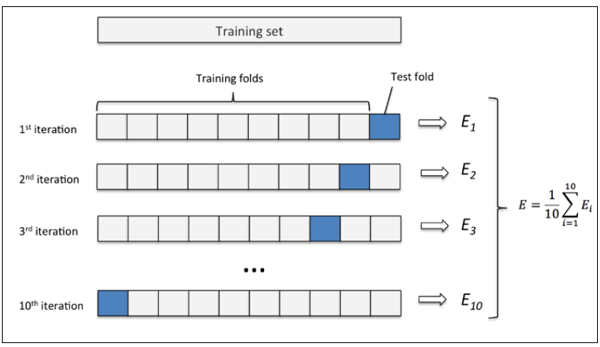

---
### 1.2.3 自助法 bootstrapping

原始数据集包含 m 个样本，则有放回的抽样 m 次，组成一个包含 m 个样本的训练集 D,一个样本经过 m 次抽样任然没有被抽取到的概率为 $(1-1/m)**m=0.368$，我们将 D 作为训练集 D-D 作为测试集，这样我们训练集和原始数据集一样有 m 个样本，同时测试集约有 1/3 的样本是训练集中没有出现过的。自助法在数据集较小、难以有效划分训练集/测试集时很有效；自助法能产生多个不同的训练集这对集成学习算法很有帮助；自助法改变了原始数据集的分布，因此在数据量足够的情况下，我们一般采用留出法和交叉验证法。

---
### 1.2.4 调参与最终模型

一般是基于验证集上的性能来进行模型的选择和调参

---
### 1.2.5 总结

1. 对于数据量充足的时候，通常采用留出法或者k折交叉验证法来进行训练/测试集的划分；
2. 对于数据集小且难以有效划分训练/测试集时使用自助法；
3. 对于数据集小且可有效划分的时候最好使用留一法来进行划分，因为这种方法最为准确

---
## 1.3 偏差bias与方差variance

模型其实就是一个有 x 到 y 的函数映射 f，我们通过已有数据训练得到这个映射 f。

偏差用于表征模型准不准，高偏差意味着模型精度较低；方差用于描述模型稳不稳，高方差意味着模型过拟合了。

偏差：描述的是预测值（估计值）的期望与真实值之间的差距。偏差越大，越偏离真实数据，如左图第二行所示。

方差：描述的是预测值的变化范围，离散程度，也就是离其期望值的距离。方差越大，数据的分布越分散，如左图右列所示。

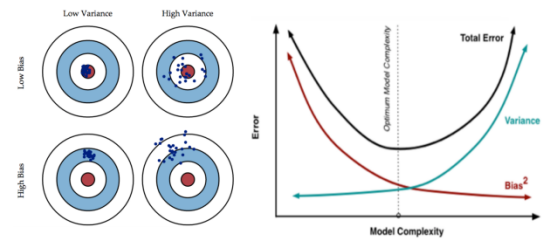

---
## 1.4 性能评估

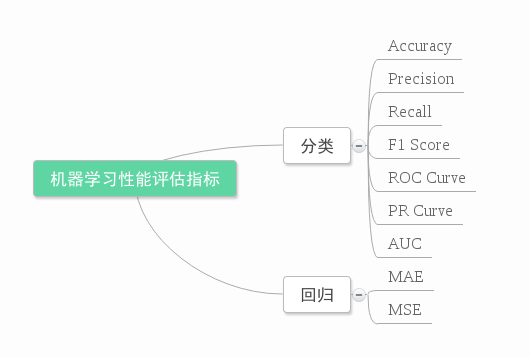

In [5]:
# sklean 库计算
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

accuracy_score(y_true, y_pred)

0.5

In [6]:
from sklearn.metrics import fbeta_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

fbeta_score(y_true, y_pred, average='macro', beta=0.5)

0.23809523809523805

---
### 1.4.1 错误率/精度（accuracy）

错误率和精度，这是分类任务中最常用的两种性能度量，既适用于二分类任务，也适用于多分类任务。

错误率是分类错误的样本数占样本总数的比例，精度则是分类正确的样本数占样本总数的比例。

---
### 1.4.2 查准率（precision）、查全率/召回率（recall）

$$准确率 = \frac{预测为真且实际也为真的个体个数}{预测为真的个体个数}$$

$$召回率 = \frac{预测为真且实际也为真的个体个数}{实际为真的个体个数}$$

我们将准确率记为P，召回率记为R，通过下面的混淆矩阵我们有 

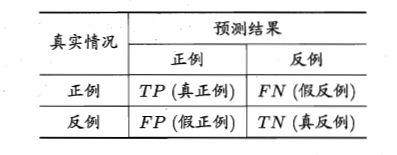

其中，TP(true positive)，FP(false positive)，FN(false negative)，TN(true negative) 

$$P = \frac{TP}{TP + FP}$$

$$R = \frac{TP}{TP + FN}$$

---
### 1.4.4 F1-score

Precision 和 Recall 指标有时候会出现的矛盾的情况，这样就需要综合考虑他们，最常见的方法就是 F-Measure（又称为F-Score）。

**P-R曲线/F1度量**

P-R曲线是以召回率R为横轴，准确率P为纵轴，然后根据模型的预测结果对样本进行排序，把最有可能是正样本的个体排在前面，而后面的则是模型认为最不可能为正例的样本，再按此顺序逐个把样本作为正例进行预测并计算出当前的准确率和召回率得到的曲线。

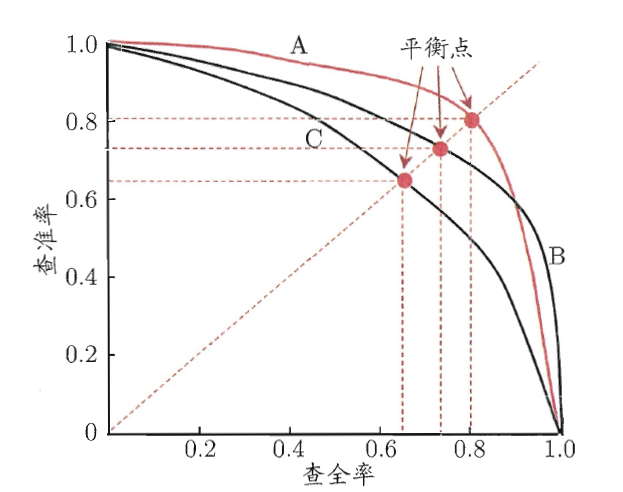

**$F_\beta$公式：**

$$F_\beta = \frac{(1+\beta^2)*P*R}{(\beta^2*P)+R}$$

* 当 $\beta = 1$ 的时候，即为 F1 度量，
* 当 $\beta < 1$ 的时候，准确率有更大的影响，
* 当 $\beta > 1$ 的时候，召回率有更大的影响

---
### 1.4.5 ROC 与 AUC 曲线

ROC曲线则是以假正例率FPR为横轴，真正例率TPR为纵轴。其中

$$FPR = \frac{FP}{FP + TN}$$

$$TPR = \frac{TP}{TP + FN}$$

我们可以看到真正例率与召回率是一样的，那么ROC曲线图如下图所示：

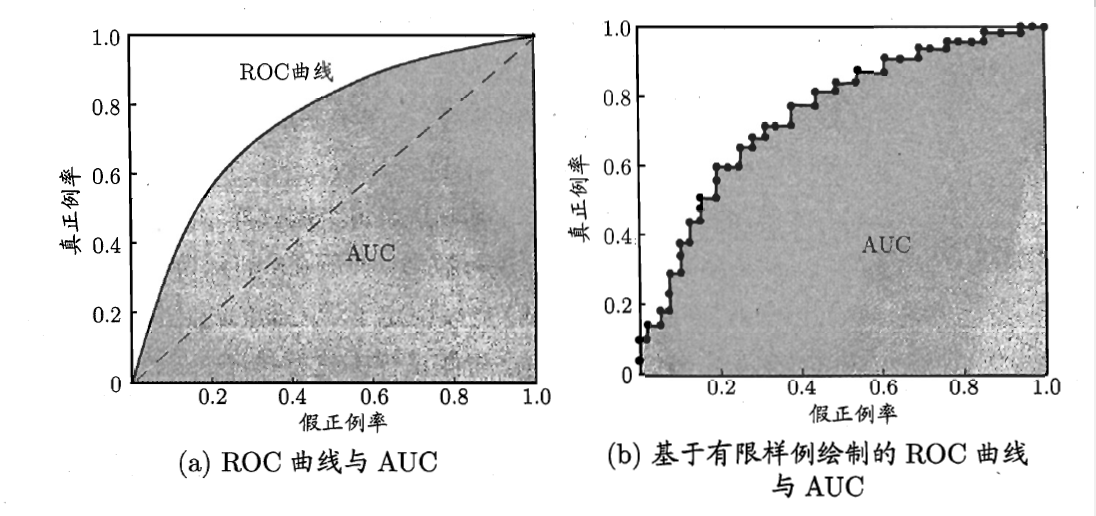

该曲线与绘制 PR 曲线类似，也是首先将样本按照正例的可能性进行排序，然后按顺序逐个把样本预测为正例（其实相当于取不同的阈值），然后计算 FPR 值和 TPR 值，即可获得该曲线。 

对于该曲线，我们首先有4个特殊的点要说明一下： 

* **(0,0)点：**我们把所有的个体都预测为假，那我们可以知道 TP 与 FP 都为 0，因为 TP 表示预测为真实际也为真，而 FP 表示预测为真实际为假的个体； 
* **(0,1)点：**我们所有预测为真的个体都正确，这是我们最理想的情况，此时 TP=TP+FN，而 FP=0； 
* **(1,0)点：**这是预测最糟糕的情况，即所有的预测都是错误的，那么此时 TP=0，而 FP=FP+TN； 
* **(1,1)点：**因为其是在 y=x 的这条直线上，因此其相当于随机预测，即我预测一个个体为真还是假都是随机的。

因此我们可以发现如果一个模型的ROC曲线越靠近与左上角，那么该模型就越优，其泛化性能就越好，但是对于两个模型，我们如何判断哪个模型的泛化性能更优呢？这里我们有主要以下两种方法：

1. 如果模型 A 的 ROC 曲线完全包住了模型 B 的 ROC 曲线，那么我们就认为模型 A要 优于模型 B；
2. 如果两条曲线有交叉的话，我们就通过比较 ROC 与 X，Y 轴所围得曲线的面积来判断，面积越大，模型的性能就越优，这个面积我们称之为 AUC(area under ROC curve) 

---
### 1.4.6 代价曲线

在上面所描述的衡量模型性能的方法都是基于误分类同等代价来开展的，即我们把 True 预测为 False 与把 False 预测为 True 所导致的代价是同等的。

但是在很多情况下其实并不是这样的，我们依然以癌症诊断为例，如果我们把一个患有癌症的患者预测为不患有与把不患有癌症的患者预测为患有明显其造成的损失是不同的，因此在这种情况下发我们是不可能以同等代价来进行预测。

故这里引入了二分类代价矩阵 

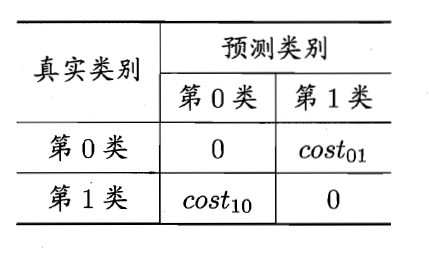

在这里我们给误分类赋予了一个代价指标。在非均等代价下，我们的目标就转化为最小化总体代价，那么代价敏感的错误率可以通过如下公式进行计算

$$E(f;D;cost) = \frac{1}{m}(\sum_{x_i \in D^+}I(f(x_i) \neq y_i)*cost_{01} + \sum_{x_i \in D^-}I(f(x_i) \neq y_i)*cost_{10})$$

由于在非均等代价下，ROC曲线并不能反映出模型的期望总体代价，因此引入了代价曲线，其中横轴为正例概率代价，纵轴为归一化代价。正例概率代价计算方式为：

$$P(+)cost = \frac{p*cost_{01}}{p*cost_{01} + (1 - p)*cost_{10}}$$

归一化代价计算方式为：

$$cost_{norm} = \frac{FNR*p*cost_{01} + FPR*(1 - P)*cost_{10}}{p*cost_{01} + (1 - p)*cost_{10}}$$

---
## 1.5 比较检验

前面介绍了各种性能度量方式，但是其度量的是模型在测试集下的测试误差的性能状况，虽然其可以近似代替泛化性能，但毕竟与真实的泛化性能有一定的距离。

在这里我们介绍通过假设检验的方式，利用测试误差来预估泛化误差从而得到模型的泛化性能情况，即基于假设检验结果我们可以推断出若在测试集上观察到模型 A 比 B 好，那么A的泛化性能在统计意义上优于 B 的概率有多大

---
### 1.5.1 假设检验

---
### 1.5.2 交叉验证 $t$ 检验

---
### 1.5.3 McNemar 检验

---
### 1.5.4 Friedman 检验 与 Nemenyi 后续检验



---
# 2. 线性模型




# sklearn 算方选择

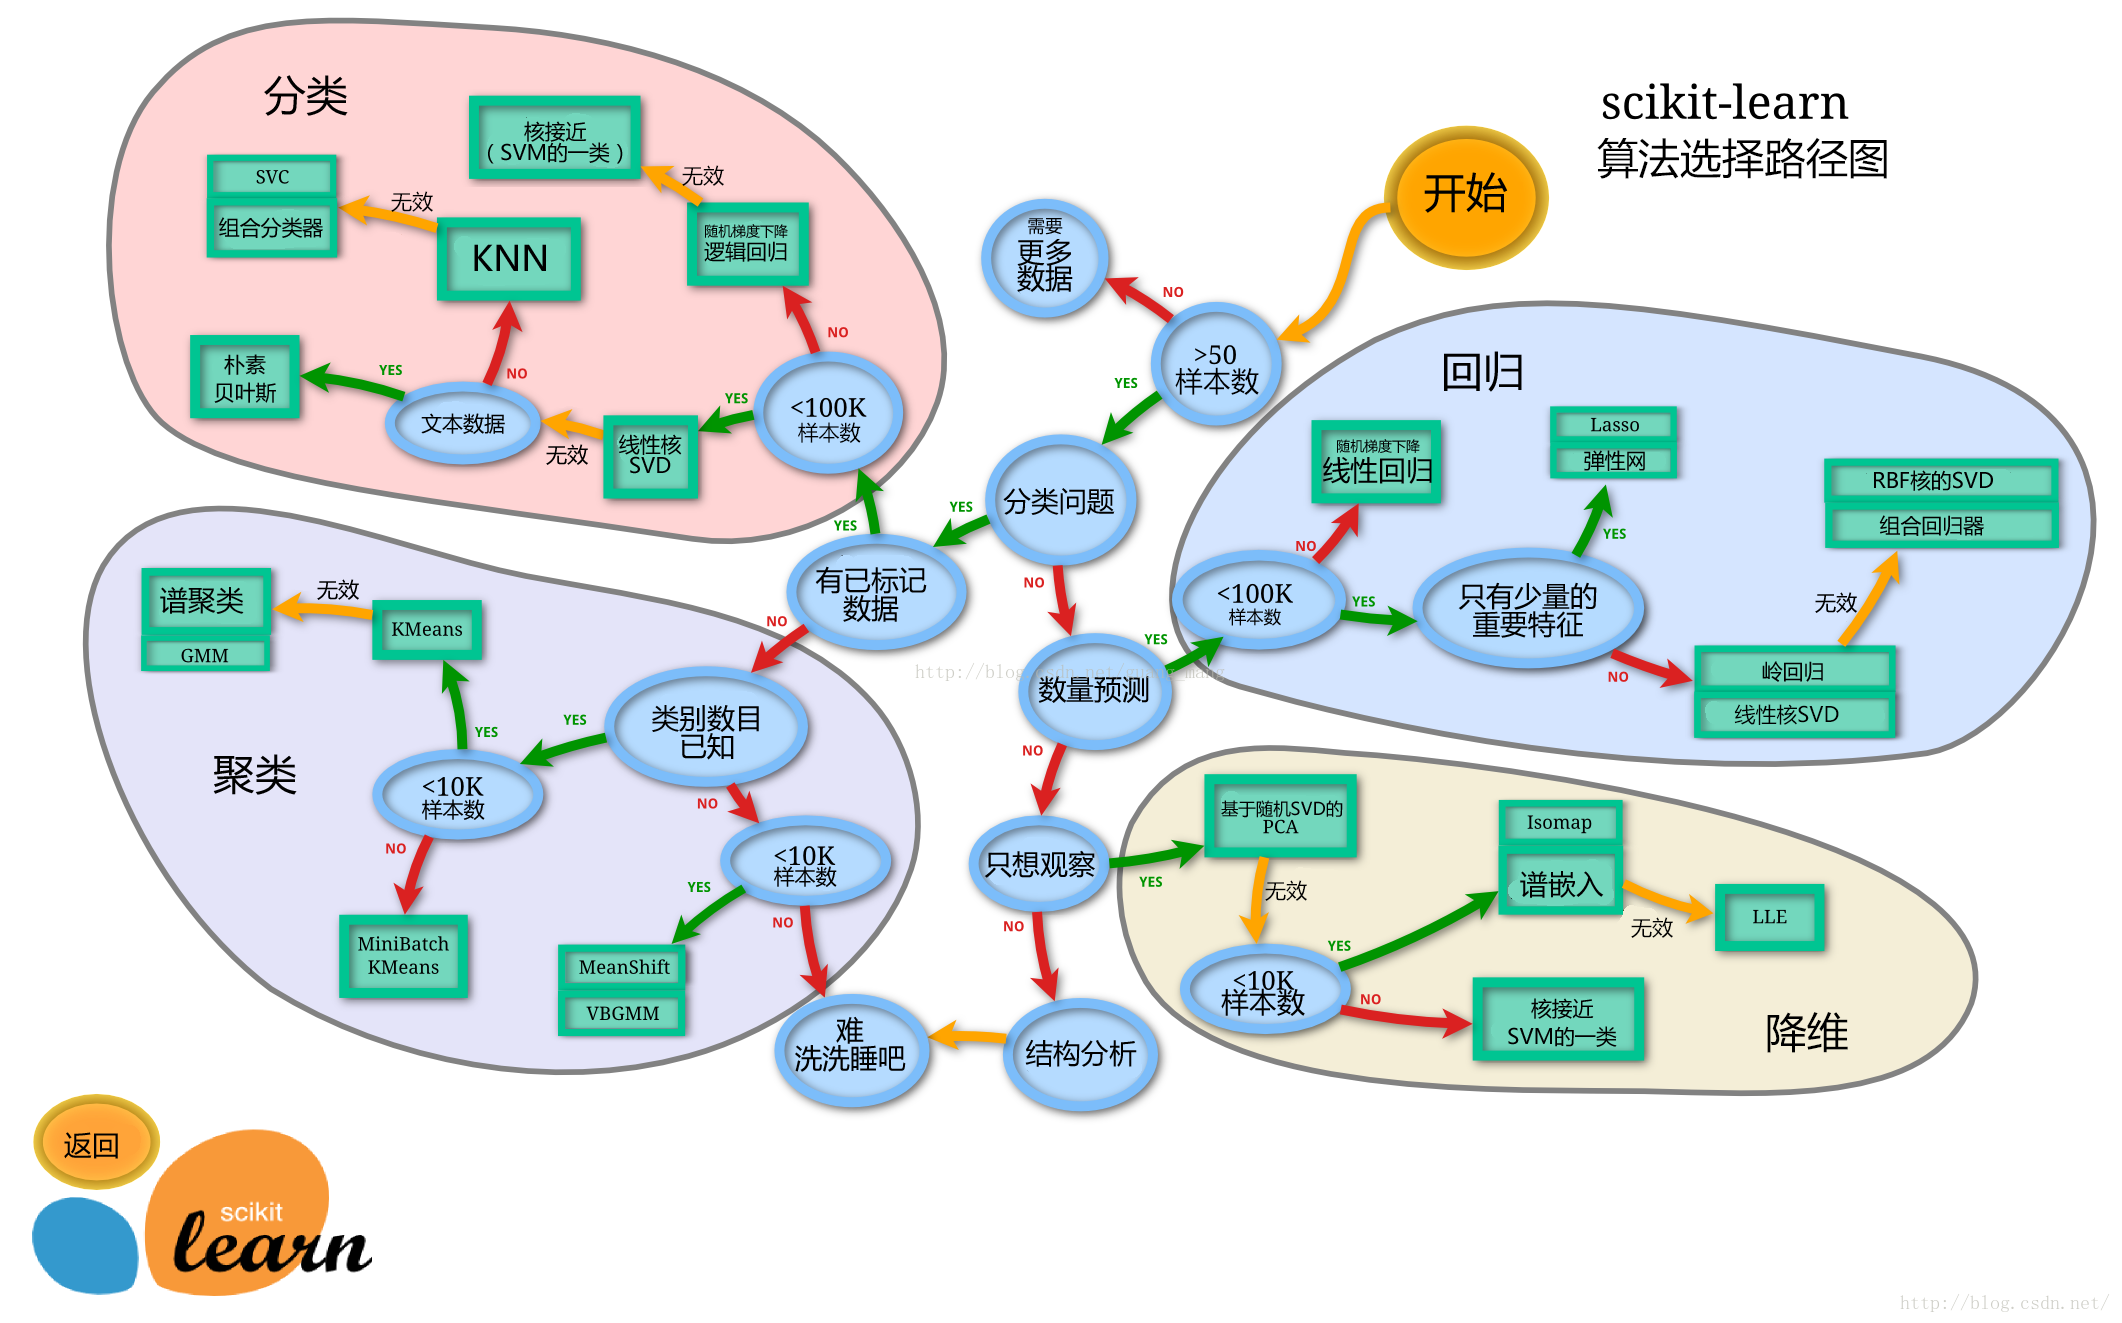

## Reference

[机器学习模型性能评估方法笔记](https://blog.csdn.net/batuwuhanpei/article/details/51884351)

[ 机器学习模型选择：调参参数选择](https://blog.csdn.net/pipisorry/article/details/52902797)

[机器学习算法常用指标总结](http://www.cnblogs.com/maybe2030/p/5375175.html)

[机器学习性能评估指标](http://charleshm.github.io/2016/03/Model-Performance/)

[Cmd Markdown 公式指导手册](https://www.zybuluo.com/codeep/note/163962)


**资料**

[神经网络浅讲：从神经元到深度学习](https://www.cnblogs.com/subconscious/p/5058741.html)

[神经网络 (Neural Network) 莫烦](https://morvanzhou.github.io/tutorials/machine-learning/ML-intro/2-1-NN/)